# Titanic data analysis

Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



### Questions to answer:

1. Did passenger sex had an effect on survival rate? And if so which sex were more likely to survive?

2. Did class where passenger stayed during travel had as effect on survival? And if so, passenger from which class were more likely to survive?

3. Did age of the passenger had effect on survival? And if so, what age were more likely to survive?

4. Did embarking port had effect on survival rate? And if so, what embarked town were more likely to survive?

5. Who were more likely to survive, passenger traveling alone or with family

6. Is there a relationship of the survival rate between age and class?

7. Did cabin of the passenger had effect on survival? And if so, what cabin were more likely to survive?






### Resources:
1. https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/v4/overview
2. https://www.udemy.com/kypython-101/learn/v4/overview
3. https://www.kaggle.com/c/titanic/data
4. https://seaborn.pydata.org/generated/seaborn.factorplot.html
5. https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot



In [69]:
# Importig libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Render plots inline
%matplotlib inline

In [70]:
# Read in the dataset
titanic = pd.read_csv('titanic-data.csv')

## Data cleanup


From the data description and questions, I've decided that some of the dataset columns will not be analysed and these columns are therefore removed. Also removal unnecessary data will speed up calculations. Assumption is that these data did not have impact on survival rate.

Columns that will be removed:
    PassengerId
    Name
    Ticket
    Cabin
    Fare
    Embarked

Data cleanup will be done in three steps:

•	Identifying  and removing any duplicate entries

•	Removing columns

•	Fixing missing data 


### Step 1 - Removing duplicate entries

In [71]:
# Print the first five lines to review the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
# Identify and remove duplicate lines
print('Number of duplications {}'.format(titanic.duplicated().sum()))

Number of duplications 0


No duplications therefore no need to remove any data

### Step 2 - Removing columns

In [73]:
#Removing columns. Assumption is that these data did not have impact on survival rate.
titanic = titanic.drop(['PassengerId','Name','Ticket','Fare'], axis=1)

In [74]:
#Printing first 20 lines to check the data
titanic[1:20]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
5,0,3,male,NaN,0,0,NaN,Q
6,0,1,male,54.0,0,0,E46,S
7,0,3,male,2.0,3,1,NaN,S
8,1,3,female,27.0,0,2,NaN,S
9,1,2,female,14.0,1,0,NaN,C
10,1,3,female,4.0,1,1,G6,S


In [75]:
#Number of missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [76]:
#Checking if there is any extreme value in age to avoid error later on
print('Maximal passenger age was {} and minimal passenger age was {}'.format(titanic['Age'].max(),titanic['Age'].min()))

Maximal passenger age was 80.0 and minimal passenger age was 0.42


In [77]:
#Checking age less then 1 year. At first I thought it is mistake but in Data description it is well explained and data is correct
titanic[titanic['Age']<1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
78,1,2,male,0.83,0,2,NaN,S
305,1,1,male,0.92,1,2,C22 C26,S
469,1,3,female,0.75,2,1,NaN,C
644,1,3,female,0.75,2,1,NaN,C
755,1,2,male,0.67,1,1,NaN,S
803,1,3,male,0.42,0,1,NaN,C
831,1,2,male,0.83,1,1,NaN,S


177 or approximately 20% of men or women did not have Age data. Missing values were not removed nor replaced with mean/median. Replacing Age with mean/median would have impact on result when analysing “did Age played role on survival rate & did Age and Class played role on survival rate”. Removing rows where age is missing would have big impact when observing ALL other analysis.

In [78]:
#Cabin column dropped because too many values are missing 687 out of 889 which is 77% of analysed data. Making conclusion on data like this could easily lead to wrong conclusion.
titanic.drop('Cabin',inplace=True,axis=1)

### 7.	Did cabin of the passenger had effect on survival? And if so, what cabin were more likely to survive? 
Not enough data to claim statement. See Issues for explanation.


In [79]:
#Printing first 25 lines to check the data
titanic[1:25]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,NaN,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C
10,1,3,female,4.0,1,1,S


In [80]:
#Checking missing Embarked values 
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [81]:
#Droping missing values
titanic.drop(titanic[titanic.Embarked.isnull()].index, inplace=True)

In [82]:
#Descriptive statistics
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,889.000000,889.000000,712.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452
std,0.486260,0.834700,14.492933,1.103705,0.806761
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


### 1.	Did passenger sex had an effect on survival rate? And if so which sex were more likely to survive?

In [83]:
#I will use this variabla for later calcualtions as number of passengers
stat00 = len(titanic.index)

In [84]:
#Counting nubmer of male and female on Titanic
stat0 = titanic['Sex'].value_counts()

In [85]:
#Calculating percentage  of male and female passengers on Titanic
stat1 = titanic['Sex'].value_counts()/len(titanic.index)*100


In [86]:
#Printing nubmer and percentage of female/male passengers on Titanic
print('{} ({}%) out of 889 passengers on Titanic were male and {} ({}%) out of 889 passengers on Titanic were female.'.format(stat0[0],stat1[0], stat0[1],stat1[1]))


577 (64.90438695163104%) out of 889 passengers on Titanic were male and 312 (35.09561304836895%) out of 889 passengers on Titanic were female.


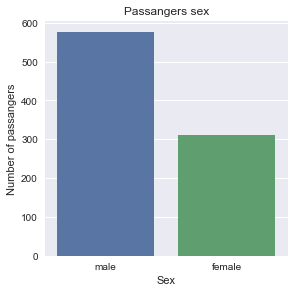

In [87]:
#Graph showing number of female and male passengers on Titanic
sns.factorplot('Sex', data = titanic, kind = 'count').set_ylabels('Number of passangers')
sns.plt.title('Passangers sex')


In [88]:
#Grouping by sex and summing the number of survived passengers
stat2 = titanic.groupby(['Sex']).sum()['Survived']


In [89]:
#Printing number of survived female and male passengers 
print('{} female passengers survived and {} male passengers survived.'.format(stat2[0],stat2[1]))


231 female passengers survived and 109 male passengers survived.


In [90]:
#Calculating and printing percentage of survive rate for male and female passengers
print('Female passengers had {}% to survive while male passengers had {}% to survive.'.format(stat2[0]/stat00*100, stat2[1]/stat00*100))

Female passengers had 25.984251968503933% to survive while male passengers had 12.260967379077616% to survive.


In [91]:
#Calculating percentage of survival rate
stat3 = titanic.groupby(['Sex']).sum()['Survived']/titanic['Sex'].value_counts()*100
    

In [92]:
#Printing percentage of survival rate
print('{}% female passengers survived and {}% male passengers survived.'.format(stat3[0],stat3[1]))

74.03846153846155% female passengers survived and 18.890814558058924% male passengers survived.


In [93]:
#New column Survivor created from column Survived for easier manipulation of data. 
titanic['Survivor'] = titanic.Survived.map({0:'No', 1:'Yes'})

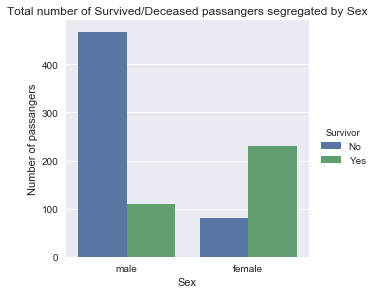

In [94]:
#Graph - count of passengers by survival and sex
sns.factorplot('Sex', data=titanic, kind = 'count', hue='Survivor').set_ylabels('Number of passangers')
sns.plt.title('Total number of Survived/Deceased passangers segregated by Sex')


Female passengers had more chances to survive than male passenger. Being a female on Titanic gave approx. 26% chances of survival and approx. 12% if being male. Approx. 75% of all female survived while only approx. 12% of all male survived.

In [95]:
#Column Pclass renamed to Passenger Class. 
titanic.rename(columns={'Pclass':'Passenger Class'}, inplace=True)

### 2.	Did class where passenger stayed during travel had as effect on survival? And if so, passenger from which class were more likely to survive?

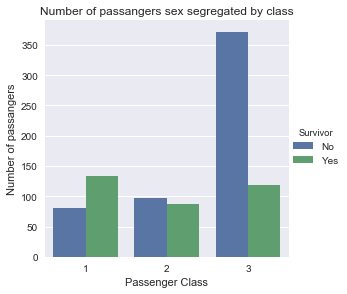

In [96]:
#Graph count of passengers by survival and passenger class
sns.factorplot('Passenger Class', data=titanic, kind = 'count', hue="Survivor").set_ylabels('Number of passangers')
sns.plt.title('Number of passangers sex segregated by class')


From the observed data, roughly the same number of passengers survived across all classes. Number of passengers that didn’t survive is significally high in third class and roughly the same for first and second class. Therefore being a passenger in first or second class gave best changes to survive.

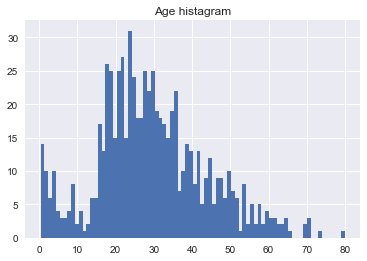

In [97]:
#Graph Age histagram
titanic['Age'].hist(bins = 80)
sns.plt.title('Age histagram')

### 3.	Did age of the passenger had effect on survival? And if so, what age were more likely to survive?

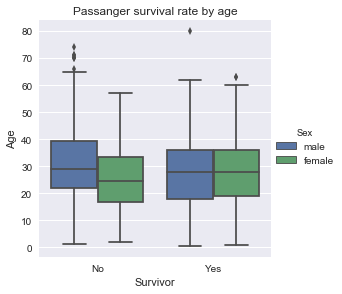

In [98]:
# Graph Age of passengers across sex and survived
sns.factorplot(x="Survivor", y="Age", hue='Sex', data=titanic, kind="box")
sns.plt.title('Passanger survival rate by age')

If only Age is observed, it had not have an effect on survival rate.

### 4.	Did embarking port had effect on survival rate? And if so, what embarked town were more likely to survive?

In [99]:
#Embarked column inputs replaces by full embarking ports. 
titanic['Embarked'].replace({ 'S':'Southampton','C':'Cherbourg', 'Q':'Queenstown'}, inplace=True)

In [100]:
# Print the first five lines to review the data
titanic.head()

,Survived,Passenger Class,Sex,Age,SibSp,Parch,Embarked,Survivor
0,0,3,male,22.0,1,0,Southampton,No
1,1,1,female,38.0,1,0,Cherbourg,Yes
2,1,3,female,26.0,0,0,Southampton,Yes
3,1,1,female,35.0,1,0,Southampton,Yes
4,0,3,male,35.0,0,0,Southampton,No


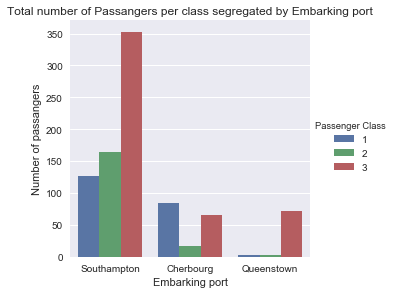

In [101]:
# Graph Count of passengers across Passenger class and Embarking port
sns.factorplot('Embarked', data = titanic, hue = 'Passenger Class', kind = 'count').set_ylabels('Number of passangers').set_xlabels('Embarking port')
sns.plt.title('Total number of Passangers per class segregated by Embarking port')

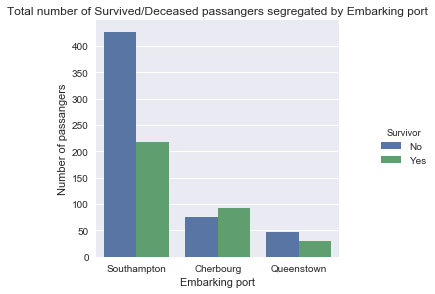

In [102]:
# Graph Count of survived passengers across Embarking port
sns.factorplot('Embarked', data=titanic, hue = 'Survivor', kind = 'count').set_ylabels('Number of passangers').set_xlabels('Embarking port')
sns.plt.title('Total number of Survived/Deceased passangers segregated by Embarking port')

Overall embarking port did not have an effect on survival rate. However passengers embarked in Cherbourg had more chances to survive if only survival rate is observed within specific port.

### 5.	Who were more likely to survive, passenger traveling alone or with family

In [103]:
# Return kid if age is less then 14, otherwise returns sex
def kid(passa):
    age, sex = passa
    if age < 14:
        return 'kid'
    else:
        return sex

In [104]:
#Column Person created from column Age and Sex
titanic['Person'] = titanic[['Age','Sex']].apply(kid, axis = 1)

The category 'kid' was assumed to be anyone under the age of 14. This is just assumption since it can be any number above or below in the time of Titanic tragedy. This assumption could lead to slightly different results when observing if “Passenger traveling with family were more likely to survive then passengers traveling alone”.


In [105]:
#Printing first 30 lines to check the data
titanic[1:30]

,Survived,Passenger Class,Sex,Age,SibSp,Parch,Embarked,Survivor,Person
1,1,1,female,38.0,1,0,Cherbourg,Yes,female
2,1,3,female,26.0,0,0,Southampton,Yes,female
3,1,1,female,35.0,1,0,Southampton,Yes,female
4,0,3,male,35.0,0,0,Southampton,No,male
5,0,3,male,NaN,0,0,Queenstown,No,male
6,0,1,male,54.0,0,0,Southampton,No,male
7,0,3,male,2.0,3,1,Southampton,No,kid
8,1,3,female,27.0,0,2,Southampton,Yes,female
9,1,2,female,14.0,1,0,Cherbourg,Yes,female
10,1,3,female,4.0,1,1,Southampton,Yes,kid


In [106]:
#Groping person data and summing the survived
titanic.groupby(['Person']).sum()['Survived']

Person
female    210
kid        42
male       88
Name: Survived, dtype: int64

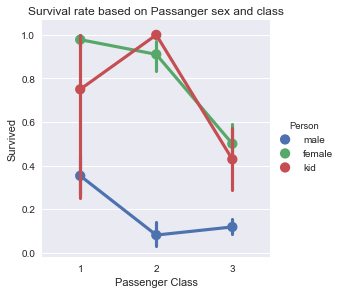

In [107]:
# Graph showing survival rate across passanger class and person
sns.factorplot('Passenger Class', 'Survived', hue = 'Person', data = titanic)
sns.plt.title('Survival rate based on Passanger sex and class')


Provided data sibsp & parch are not defined well. For example it is not possible to determine if female passenger is traveling with kids or traveling with parents.

In [108]:
#Column w/o family created from columns SibSp and Parch.
titanic['w/o family'] = titanic.SibSp + titanic.Parch
titanic['w/o family'].loc[titanic['w/o family']>0] = "with family"
titanic['w/o family'].loc[titanic['w/o family']== 0] = 'without family'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [109]:
# Print the first five lines to review the data
titanic.head()

,Survived,Passenger Class,Sex,Age,SibSp,Parch,Embarked,Survivor,Person,w/o family
0,0,3,male,22.0,1,0,Southampton,No,male,with family
1,1,1,female,38.0,1,0,Cherbourg,Yes,female,with family
2,1,3,female,26.0,0,0,Southampton,Yes,female,without family
3,1,1,female,35.0,1,0,Southampton,Yes,female,with family
4,0,3,male,35.0,0,0,Southampton,No,male,without family


In [110]:
#Grouping data with/without family
titanic.groupby(['w/o family']).sum()['Survived']

w/o family
with family       179
without family    161
Name: Survived, dtype: int64

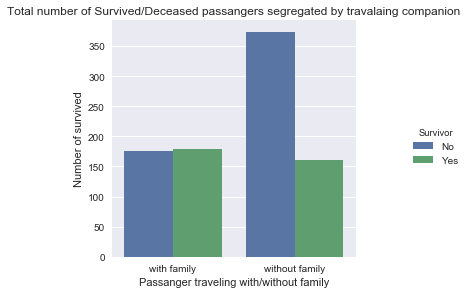

In [111]:
#Graph Count of survived passengers travaling wiht family / without family
sns.factorplot('w/o family', data = titanic, hue = 'Survivor', kind = 'count').set_ylabels('Number of survived').set_xlabels('Passanger traveling with/without family')
sns.plt.title('Total number of Survived/Deceased passangers segregated by travalaing companion')


Passenger traveling with family were more likely to survive then passengers traveling alone.

### 6.	Is there a relationship of the survival rate between age and class?

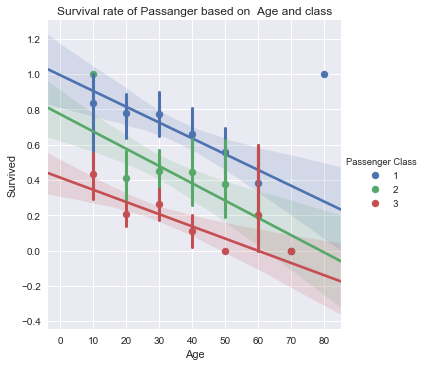

In [112]:
#Graph comparing survival rate wiht passenger class and age
gener = [10,20,30,40,50,60,70,80]
sns.lmplot('Age', 'Survived', hue = 'Passenger Class', data = titanic, x_bins = gener)
sns.plt.title('Survival rate of Passanger based on  Age and class')


Younger passengers from upper classes were more likely to survive then older passengers from lower classes.

## Data Wrangling

'PassengerId','Name','Ticket','Fare' columns dropped since they will not be analysed. Assumption is that these data did not have impact on survival rate.
'Cabin' column dropped. See explanation in Conclusion Issues section.
2 Embarked ports are missing and therefore these rows are dropped since they will not have big impact on other analysis.
New column Survivor created from column Survived for easier manipulation of data.
Column Pclass renamed to Passenger Class. 
Column Person created from column Age and Sex.
Embarked column inputs replaces by full embarking ports.
Column w/o family created from columns SibSp and Parch. 





## Answers to the questions:

1. Female passengers had more chances to survive than male passenger. Being a female on Titanic gave approx. 26% chances of survival and approx. 12% if being male. Approx. 75% of all female survived while only approx. 12% of all male survived.

2. From the observed data, roughly the same number of passengers survived across all classes. Number of passengers that didn’t survive is significally high in third class and roughly the same for first and second class. Therefore being a passenger in first or second class gave best changes to survive.

3. If only Age is observed, it had not have an effect on survival rate. 

4. Overall embarking port did not have an effect on survival rate. However passengers embarked in Cherbourg had more chances to survive if only survival rate is observed within specific port.

5. Passenger traveling with family were more likely to survive then passengers traveling alone.

6. Younger passengers from upper classes were more likely to survive then older passengers from lower classes.

7. Not enough data to claim statement. See Issues for explanation.








## Conclusion
The results of the analysis showed that sex and class had major impact on survivor rate. Female from upper class, had the best chance of survival while being a man in third class had the lowest chance of survival. Women and children across all classes had a higher survival rate than men. Also from the analysis it can be observed that younger passengers from upper class had more chances to survive then older passengers from lower classes.


### Issues

Cabin column dropped because too many values are missing 687 out of 889 which is 77% of analysed data. Making conclusion on data like this could easily lead to wrong conclusion.

177 or approximately 20% of men or women did not have Age data. Missing values were not removed nor replaced with mean/median. Replacing Age with mean/median would have impact on result when analysing “did Age played role on survival rate & did Age and Class played role on survival rate”. Removing rows where age is missing would have big impact when observing ALL other analysis.

The category 'kid' was assumed to be anyone under the age of 14. This is just assumption since it can be any number above or below in the time of Titanic tragedy. This assumption could lead to slightly different results when observing if “Passenger traveling with family were more likely to survive then passengers traveling alone”.

Provided data sibsp & parch are not defined well. For example it is not possible to determine if female passenger is traveling with kids or traveling with parents. 


